# Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: *Iron Man 1* and *Iron Man 2*. Most of the actors played in both movies. Use an outer join to find actors **who did not** act in both movies.

The Iron Man 1 table is called *iron_1_actors*, and Iron Man 2 table is called *iron_2_actors*. Both tables have been loaded for you and a few rows printed so you can see the structure.

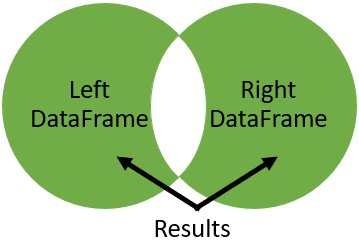

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
path=r'/media/documentos/Cursos/Data Science/Python/Data_Science_Python/data_sets/'

movies=pd.read_pickle(path+'movies.p')
toy_story=movies[movies['title'].str.contains('Iron Man', na=False)]
print('movies \n',movies.head(),'\n')

casts=pd.read_pickle(path+'casts.p')
#land_use.astype({'ward': 'int32'}).dtypes
print('casts \n',casts.head(),'\n')
#print('genres \n',movie_to_genres['genre'].unique(),'\n')

print(movies[movies['title'].str.contains('Iron Man', na=False)])

iron_1 = movies[movies['title']=='Iron Man'].merge(casts,left_on='id',right_on='movie_id',suffixes=('_mov',''))
#print(iron_1.head())
iron_1_actors=iron_1[['character','id','name']]
print('\n iron_1_actors',iron_1_actors.head(),'\n')
iron_2 = movies[movies['title']=='Iron Man 2'].merge(casts,left_on='id',right_on='movie_id',suffixes=('_mov',''))
print(iron_2.head())
iron_2_actors=iron_2[['character','id','name']]
print('\n iron_2_actors',iron_2_actors.head(),'\n')

movies 
       id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17 

casts 
     movie_id  cast_id character  gender    id               name
7          5       22   Jezebel       1  3122        Sammi Davis
8          5       23     Diana       1  3123  Amanda de Cadenet
9          5       24    Athena       1  3124     Valeria Golino
3          5       25   Elspeth       1  3125            Madonna
12         5       26       Eva       1  3126          Ione Skye 

         id       title  popularity release_date
2198   1726    Iron Man  120.725053   2008-04-30
3286  68721  Iron Man 3   77.682080   2013-04-18
3401  10138  Iron Man 2   77.300194   2010-04-28

 iron_1_actors                                       cha

In [30]:
print('\n iron_1_actors',iron_1_actors.head(),'\n')


 iron_1_actors                                       character     id             name
0                                        Yinsen  17857       Shaun Toub
1                       Virginia "Pepper" Potts  12052  Gwyneth Paltrow
2                   Obadiah Stane / Iron Monger   1229     Jeff Bridges
3  Lt. Col. James "Rhodey" Rhodes / War Machine  18288  Terrence Howard
4                            Christine Everhart  57451      Leslie Bibb 



In [31]:
print('\n iron_2_actors',iron_2_actors.head(),'\n')


 iron_2_actors                                           character     id                name
0                             Ivan Vanko / Whiplash   2295       Mickey Rourke
1  Natalie Rushman / Natasha Romanoff / Black Widow   1245  Scarlett Johansson
2                                     Justin Hammer   6807        Sam Rockwell
3                                Director Nick Fury   2231   Samuel L. Jackson
4                           Virginia "Pepper" Potts  12052     Gwyneth Paltrow 



- Save to *iron_1_and_2* the merge of *iron_1_actors* (left) with *iron_2_actors* tables with an outer join on the id column, and set suffixes to *('_1','_2')*.
- Create an index that returns *True* if *name_1* or *name_2* are null, and False otherwise.

In [35]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     how='outer',
                                     on='id',
                                     suffixes=('_1','_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                                    character_1      id           name_1  \
0                                        Yinsen   17857       Shaun Toub   
2                   Obadiah Stane / Iron Monger    1229     Jeff Bridges   
3  Lt. Col. James "Rhodey" Rhodes / War Machine   18288  Terrence Howard   
5                                          Raza   57452      Faran Tahir   
8                                    Abu Bakaar  173810    Sayed Badreya   

  character_2 name_2  
0         NaN    NaN  
2         NaN    NaN  
3         NaN    NaN  
5         NaN    NaN  
8         NaN    NaN  
